#Notebook para el Informe de Preprocesamiento de la BASEFUGA.xlsx del problema de fuga de clientes.

## Instalaciones y importaciones de bibliotecas

In [ ]:
!pip install --upgrade plotly -q
!pip install jupyter-dash -q
!pip install --upgrade pandas -q

     |████████████████████████████████| 28.8 MB 46.9 MB/s 
     |████████████████████████████████| 9.6 MB 43.2 MB/s 
     |████████████████████████████████| 357 kB 54.0 MB/s 


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#from google.colab import drive
#drive.mount('/content/drive')
import numpy as np # library para algebra linear
import pandas as pd # library para trabajar con bases de datos en el formato 'dataset'
# importaciones de los frameworks y modulos de la library Plotly para generar visualizaciones más avanzadas
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sn
from pandas.api.types import is_numeric_dtype
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer
np.set_printoptions(suppress=True)
#Importaciones para el pre procesamiento de datos
from sklearn.experimental import enable_iterative_imputer # Auxiliar para el método abajo
from sklearn.impute import IterativeImputer
#Métodos y funciones para selección de atributos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif

Mounted at /content/drive


## Análises Exploratorio de Datos

---
En esta sección nos dedicamos a hacer análisis uni y bivariado de los datos con la intención de comprender mejor la base de datos, sus patrones y detectar posibles errores o outliers.


In [ ]:
# read bases de datos
df_fuga = pd.read_excel('https://github.com/EnzoGolfetti/praticas_python/blob/main/business_intelligence_FEN/BASEFUGA-1.xlsx?raw=true'
                        )
df_fuga.head(12)

,ID,GENERO,RENTA,EDAD,NIV_EDUC,E_CIVIL,COD_OFI,COD_COM,CIUDAD,D_Marzo,D_Abril,D_Mayo,D_Junio,D_Julio,D_Agosto,D_Septiembre,M_MOROSO,MONTO,SEGURO,FUGA
0,1,M,746476,39.0,MED,CAS,68.0,213,LOS ANGELES,0.0,38292.0,0,434357,1766.0,9110.0,340,2.0,2000000.0,NO,NO FUGA
1,2,F,11901,49.0,MED,VIU,16.0,89,SANTIAGO,0.0,0.0,0,0,48.0,0.0,0,1.0,7500000.0,SI,NO FUGA
2,3,M,1651421,39.0,TEC,CAS,90.0,16,ANTOFAGASTA,0.0,604169.0,0,0,323.0,26489.0,2925,1.0,8000000.0,NO,NO FUGA
3,4,F,638969,36.0,UNV,CAS,85.0,115,SANTIAGO,0.0,5125.0,0,198998,94.0,0.0,105,1.0,2600000.0,NO,NO FUGA
4,5,M,860113,44.0,TEC,CAS,45.0,80,SANTIAGO,0.0,11946.0,0,73959,149.0,0.0,272,1.0,6400000.0,NO,NO FUGA
5,6,M,329463,40.0,TEC,CAS,53.0,92,SANTIAGO,0.0,187538.0,0,12008,641.0,118.0,154,2.0,7700000.0,NO,FUGA
6,7,M,28732,45.0,UNV,CAS,55.0,90,SANTIAGO,559984.0,532706.0,0,0,1464.0,15600.0,1523,1.0,2900000.0,NO,FUGA
7,8,F,11563,41.0,TEC,SOL,47.0,112,SANTIAGO,0.0,141317.0,0,525325,13.0,0.0,477,1.0,2100000.0,SI,NO FUGA
8,9,F,3044549,33.0,MED,CAS,22.0,1,ARICA,0.0,102078.0,0,0,44.0,0.0,0,1.0,1600000.0,NO,NO FUGA
9,10,F,3632707,39.0,MED,VIU,27.0,89,SANTIAGO,0.0,162658.0,0,445896,865.0,0.0,907,1.0,2800000.0,NO,NO FUGA


In [ ]:
# Descripción de las columnas y forma de la basis
df_fuga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            2294 non-null   int64  
 1   GENERO        2283 non-null   object 
 2   RENTA         2294 non-null   int64  
 3   EDAD          2292 non-null   float64
 4   NIV_EDUC      2292 non-null   object 
 5   E_CIVIL       2282 non-null   object 
 6   COD_OFI       2291 non-null   float64
 7   COD_COM       2294 non-null   object 
 8   CIUDAD        2293 non-null   object 
 9   D_Marzo       2293 non-null   float64
 10  D_Abril       2293 non-null   float64
 11  D_Mayo        2294 non-null   int64  
 12  D_Junio       2294 non-null   int64  
 13  D_Julio       2293 non-null   float64
 14  D_Agosto      2293 non-null   float64
 15  D_Septiembre  2294 non-null   int64  
 16  M_MOROSO      2292 non-null   float64
 17  MONTO         2293 non-null   float64
 18  SEGURO        2294 non-null 

Entonces en esta basis tenemos **20 columnas y 2294 registros**.

- 5 columnas de tipo 'int64' o entero;

- 7 columnas de tipo 'object' que pueden ser strings o like-wise dateformat's;

- 8 columns de tipo 'float64' o decimales (también conocidas cómo de punto flotante);
---
Mirando a la columna 'Non-null Count' tenemos que la mayoría de las columnas tienen 1 o más datos 'NULL' (perdidos) y más especificamente **'GENERO'** es la columna con más datos 'NULL' - 11.


In [ ]:
# Para que sea más fácil trabajar con las columns, las ponemos en minúsculas y para garantizar que no hayan espacios en los nombres das colunas ponemos el método 'strip'
df_fuga.columns = df_fuga.columns.str.lower().str.strip()

In [ ]:
df_fuga.describe(include='all')

,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga
count,2294.000000,2283,2.294000e+03,2292.000000,2292,2282,2291.000000,2294.0,2293,2.293000e+03,2.293000e+03,2.294000e+03,2.294000e+03,2293.000000,2293.000000,2294.000000,2292.000000,2.293000e+03,2294,2294
unique,NaN,2,NaN,NaN,6,4,NaN,118.0,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,M,NaN,NaN,UNV,CAS,NaN,90.0,SANTIAGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO FUGA
freq,NaN,1385,NaN,NaN,946,1429,NaN,262.0,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816,1157
mean,1147.500000,NaN,8.527563e+05,43.551920,NaN,NaN,68.588826,NaN,NaN,1.530874e+05,2.726998e+05,1.032315e+05,1.899761e+05,567.093328,3580.321413,1940.639494,1.250436,3.477824e+06,NaN,NaN
std,662.365081,NaN,1.379715e+06,8.875511,NaN,NaN,40.170177,NaN,NaN,4.982859e+05,4.024124e+05,8.706984e+05,6.705042e+05,1075.500117,8944.021261,9868.816840,0.752197,2.293166e+06,NaN,NaN
min,1.000000,NaN,1.760000e+02,-50.000000,NaN,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05,NaN,NaN
25%,574.250000,NaN,1.003815e+05,39.000000,NaN,NaN,31.000000,NaN,NaN,0.000000e+00,1.759600e+04,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,1.000000,1.700000e+06,NaN,NaN
50%,1147.500000,NaN,3.699345e+05,44.000000,NaN,NaN,56.000000,NaN,NaN,0.000000e+00,1.341700e+05,0.000000e+00,5.502000e+03,146.000000,0.000000,56.000000,1.000000,2.600000e+06,NaN,NaN
75%,1720.750000,NaN,8.267582e+05,50.000000,NaN,NaN,92.000000,NaN,NaN,0.000000e+00,3.745150e+05,0.000000e+00,1.749060e+05,630.000000,1493.000000,497.250000,2.000000,4.800000e+06,NaN,NaN


In [ ]:
#Describe dividido
df_fuga_describe_cat = df_fuga.describe(include='all')
df_fuga_describe_cat = df_fuga_describe_cat.loc[:, [ 'genero', 'niv_educ', 'e_civil', 'ciudad', 'seguro', 'fuga' ]]
df_fuga_describe_cat = df_fuga_describe_cat.rename(columns={'genero':'Género', 'niv_educ':'Nivel_Educacional', 'e_civil':'Estado_Civil', 'ciudad':'Ciudades', 'seguro':'Seguro', 
                                                            'fuga':'VarObj_Fuga'})

idx = pd.IndexSlice
slice_genero = idx[idx['top'], idx['Género']]
slice_educ = idx[idx['top'], idx['Nivel_Educacional']]
slice_seguro = idx[idx['top'], idx['Seguro']]
slice_ciudad = idx[idx['top'], idx['Ciudades']]
slice_edad = idx[idx['mean'], idx['edad']]

display("Categóricas")
df_fuga_describe_cat.style.set_properties(**{'background-color': '#A619D4'}, subset=slice_genero)\
                                  .set_properties(**{'background-color': '#A619D4'}, subset=slice_educ)\
                                  .set_properties(**{'background-color': '#A619D4'}, subset=slice_ciudad)\
                                  .set_properties(**{'background-color': '#A619D4'}, subset=slice_seguro)

'Categóricas'

,Género,Nivel_Educacional,Estado_Civil,Ciudades,Seguro,VarObj_Fuga
count,2283,2292,2282,2293,2294,2294
unique,2,6,4,76,2,2
top,M,UNV,CAS,SANTIAGO,NO,NO FUGA
freq,1385,946,1429,1389,1816,1157
mean,nan,nan,nan,nan,nan,nan
std,nan,nan,nan,nan,nan,nan
min,nan,nan,nan,nan,nan,nan
25%,nan,nan,nan,nan,nan,nan
50%,nan,nan,nan,nan,nan,nan
75%,nan,nan,nan,nan,nan,nan


In [ ]:
df_fuga_describe_num = df_fuga.describe(include='all')
df_fuga_describe_num = df_fuga_describe_num.loc[:, [ 'id', 'renta', 'edad', 'cod_ofi', 'cod_com', 'd_marzo', 'd_abril', 'd_mayo', 'd_junio', 'd_julio', 'd_agosto', 'd_septiembre', 'm_moroso', 'monto']]

display("Numéricas")
display(df_fuga_describe_num.iloc[:,:7].style.set_properties(**{'background-color': '#A619D4'}, subset=slice_edad))
display(df_fuga_describe_num.iloc[:,7:])

'Numéricas'

,id,renta,edad,cod_ofi,cod_com,d_marzo,d_abril
count,2294.000000,2294.000000,2292.000000,2291.000000,2294.000000,2293.000000,2293.000000
unique,nan,nan,nan,nan,118.000000,nan,nan
top,nan,nan,nan,nan,90.000000,nan,nan
freq,nan,nan,nan,nan,262.000000,nan,nan
mean,1147.500000,852756.265911,43.551920,68.588826,nan,153087.376363,272699.764937
std,662.365081,1379715.209421,8.875511,40.170177,nan,498285.949439,402412.444628
min,1.000000,176.000000,-50.000000,0.000000,nan,0.000000,0.000000
25%,574.250000,100381.500000,39.000000,31.000000,nan,0.000000,17596.000000
50%,1147.500000,369934.500000,44.000000,56.000000,nan,0.000000,134170.000000
75%,1720.750000,826758.250000,50.000000,92.000000,nan,0.000000,374515.000000


,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto
count,2.294000e+03,2.294000e+03,2293.000000,2293.000000,2294.000000,2292.000000,2.293000e+03
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.032315e+05,1.899761e+05,567.093328,3580.321413,1940.639494,1.250436,3.477824e+06
std,8.706984e+05,6.705042e+05,1075.500117,8944.021261,9868.816840,0.752197,2.293166e+06
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05
25%,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,1.000000,1.700000e+06
50%,0.000000e+00,5.502000e+03,146.000000,0.000000,56.000000,1.000000,2.600000e+06
75%,0.000000e+00,1.749060e+05,630.000000,1493.000000,497.250000,2.000000,4.800000e+06


Supe los datos:

- La mayoría **(60%)** son del género masculino;
- La edad media de nuestra basis es **43** años, o sea son clientes en su mejor *momentum* para tomar y hacer el pago de préstamos y otros servicios financieros qué resultan en mejores ganancias para la entidad;
- **40%** de los clientes en la basis tiene superior completo;
- La mayoría se encuentra en Santiago;
- Hay muchos clientes sin ninguna deuda en los meses observados, qué refueza la importancia de conseguir mantener estes clientes;
- La cantidad máxima de meses en Mora es 3;
- La mayoría no tiene seguro (esto puede servir en el futuro cómo una estrategia de retención);
- Tenemos una basis con variable objetivo bien dividida en 50%, el que va nos ayudar en la aplicación de los modelos de Machine Learning sin sufrir mucho con datos desbalanceados.

Graficamente podremos confirmar nuestro dato supe distribución de la edad, la mayoría se concentra **después de los 40 años**.

Y identifcamos errores grandes en los datos pero con pocas repeticiones, tenemos 3 datos menores que 0 y 3 datos muy altos: 99, 115 e 130 años (la persona más vieja del mundo tiene 119 años y no es factible que se ofrezca servicios financieros para alguien con 99 años).

###Análisis de las variables categóricas.

In [ ]:
#Mirando la columna de género
df_genero_aux = df_fuga.copy()
df_genero_aux['genero'] = df_genero_aux['genero'].str.replace('F','Femenino').str.replace('M','Masculino')
df_genero_aux = df_genero_aux.groupby(['genero']).count()
df_genero_aux['coluna_auxiliar_color'] = 'color'
fig = px.bar(df_genero_aux, x=df_genero_aux.index, y='id', title='Distribución de clientes por genero', text_auto=True,
             labels=dict(genero='Género', id='Cantidad de Clientes'), color='coluna_auxiliar_color', color_discrete_sequence=['#00266C'])
fig.update_layout(autosize=True, margin=dict(l=1,r=20,t=32,b=1), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=False,
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15)
fig.update_yaxes(gridcolor='#CCCCCC')
fig

Tenemos especial interés en la columna 'niv_educ' porqué comprender mejor el nivel educacional de los clientes sean predecidos cómo nos puede ayudar en el diseño de políticas especificas para cada un de los niveles.

In [ ]:
df_educacion_aux = df_fuga.copy()
df_educacion_aux['niv_educ'] = df_educacion_aux['niv_educ'].str.replace('BAS','Basica').str.replace('MED','Média').str.replace('TEC','Técnica').str.replace('UNV','Universitaria')
df_educacion_aux = df_educacion_aux.groupby(['niv_educ']).count()
df_educacion_aux['coluna_auxiliar_color'] = 'color'
fig_3 = px.bar(df_educacion_aux, x=df_educacion_aux.index, y='id', title='Distribución de clientes por nivel educacional', text_auto=True,
             labels=dict(niv_educ='Nivel Educacional', id='Cantidad de Clientes'), color='coluna_auxiliar_color', color_discrete_sequence=['#1B19D4'])
fig_3.update_layout(autosize=True,
                    margin=dict(l=1,r=20,t=32,b=1), 
                    paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=False, 
                    title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15
                    )
fig_3.add_annotation(xref='x', 
                    yref='y',
                    x=0.21,
                    y=20,
                    text="Valores no especificos",
                    font_family='Open Sans',
                    font_color='#00266C',
                    showarrow=True,
                    arrowhead=1,
                    arrowcolor='#00266C',
                    arrowwidth=2,
                    ax=30,
                    ay=-70
                    )
fig_3.update_yaxes(gridcolor='#CCCCCC')

El primer que identifcamos son los 11 clientes sin identificación de Nivel Educacional, más a frente tendremos qué tratar estos datos así cómo tratar las edades erróneas.

Cómo ya habíamos adelantado tenemos más personas con nivel universitario en la basis, pero un número (57%) también relevante de nivel técnico y enseñanza media.

In [ ]:
#Mirando Estado Civil
df_e_civil_aux = df_fuga.copy()
df_e_civil_aux['e_civil'] = df_e_civil_aux['e_civil'].str.replace('CAS','Casado').str.replace('SEP','Separado').str.replace('SOL','Soltero').str.replace('VIU','Viuvo')
df_e_civil_aux = df_e_civil_aux.groupby(['e_civil']).count()
df_e_civil_aux['coluna_auxiliar_color'] = 'color'
fig = px.bar(df_e_civil_aux, x=df_e_civil_aux.index, y='id', title='Distribución de clientes por Estado Civil', text_auto=True,
             labels=dict(e_civil='Estado Civil', id='Cantidad de Clientes'), color='coluna_auxiliar_color', color_discrete_sequence=['#7328EB'])
fig.update_layout(autosize=True, margin=dict(l=1,r=20,t=32,b=1), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=False, 
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15)
fig.update_yaxes(gridcolor='#CCCCCC')
fig

Aquí se puede ver la correlación con edad, con la edad média en 40 años, esperabamos mismo que la mayoría de los clientes sean casados.

In [ ]:
#Seguro
df_seguro = df_fuga['seguro'].value_counts().to_frame()
df_seguro['coluna_auxiliar_color'] = 'color'
fig = px.bar(df_seguro, x=df_seguro.index, y='seguro', labels=dict(index='Seguro', seguro='Count'),
             color='coluna_auxiliar_color', color_discrete_sequence=['#1B19D4'], text_auto=True)
fig.update_layout(height=500, width=1500, margin=dict(l=1,r=20,t=50,b=1), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=False, 
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text='Distribución del servicio de Seguro')
fig.update_xaxes(categoryorder='array', categoryarray=['0','1','2','3'])
fig.update_yaxes(gridcolor='#CCCCCC')
fig.show()

In [ ]:
#Fuga
df_fuga_grafico = df_fuga['fuga'].value_counts().to_frame()
df_fuga_grafico['coluna_auxiliar_color'] = 'color'
fig = px.bar(df_fuga_grafico, x=df_fuga_grafico.index, y='fuga', labels=dict(index='Fuga', seguro='Count'),
             color='coluna_auxiliar_color', color_discrete_sequence=['#00266C'], text_auto=True)
fig.update_layout(height=500, width=1500, margin=dict(l=1,r=20,t=50,b=1), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=False, 
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text="Distribución de la Variable Objetivo 'Fuga'")
fig.update_xaxes(categoryorder='array', categoryarray=['0','1','2','3'])
fig.update_yaxes(gridcolor='#CCCCCC')
fig.show()

###Análisis de las variables numéricas.

In [ ]:
#Mirando la columna de Edad
df_edad_aux = df_fuga['edad'].value_counts().to_frame().reset_index(drop=False).rename(columns={'index':'edad','edad':'count'}).astype({'edad':'int64'})
df_edad_aux['coluna_auxiliar_color'] = 'color'
fig = px.bar(df_edad_aux, x='edad', y='count', title='Distribución de clientes por edad', text_auto=True,
             labels=dict(edad='Edad',count='Cantidad de Clientes'), color='coluna_auxiliar_color', color_discrete_sequence=['#7328EB'])
fig.update_layout(autosize=True, margin=dict(l=1,r=20,t=32,b=1), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF',  showlegend=False, 
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15)
fig.update_yaxes(gridcolor='#CCCCCC')
fig

In [ ]:
#Visualizando columns de renta
df_renta_aux = df_fuga.copy()
df_renta_aux['renta'] = df_renta_aux['renta'] / 1000000
df_renta_aux['coluna_auxiliar_color'] = 'color'
fig = px.histogram(df_renta_aux, x='renta', nbins=100, title='Distribuición de la renta', labels=dict(renta='Renta (en millones de pesos chilenos)'), 
                   color='coluna_auxiliar_color', color_discrete_sequence=['#1B19D4'])
fig.update_layout(autosize=True, margin=dict(l=1,r=20,t=32,b=1), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=False, 
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15)
fig.update_xaxes(nticks=20)
fig.update_yaxes(gridcolor='#CCCCCC')
fig

Cómo retratado en la evidencia ya esperábamos una distribución *exponencial* de la renta, el que quiere decir que la mayoría de los datos está más cerca de zero que de el promedio.

In [ ]:
#Mirando las colunas de Deuda
fig = make_subplots(rows = 3, cols=3, subplot_titles=('Deuda en Marzo', 'Deuda en Abril', 'Deuda en Mayo', 'Deuda en Junio', 'Deuda en Julio', 'Deuda en Agosto', None, 'Deuda en Septiembre'))
fig.add_trace(go.Histogram(x=df_fuga['d_marzo'], name='Deuda en Marzo'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_fuga['d_abril'], name='Deuda en Abril'), row=1, col=2)
fig.add_trace(go.Histogram(x=df_fuga['d_mayo'], name='Deuda en Mayo'), row=1, col=3)
fig.add_trace(go.Histogram(x=df_fuga['d_junio'], name='Deuda en Junio'), row=2, col=1)
fig.add_trace(go.Histogram(x=df_fuga['d_julio'], name='Deuda en Julio'), row=2, col=2)
fig.add_trace(go.Histogram(x=df_fuga['d_agosto'], name='Deuda en Agosto'), row=2, col=3)
fig.add_trace(go.Histogram(x=df_fuga['d_septiembre'], name='Deuda en Septiembre'), row=3, col=2)
fig.update_layout(height=500, width=1500, margin=dict(l=1,r=20,t=50,b=1), title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text='Avanzo mensual de las deudas')
fig

El primer que podremos percibir es que la varianza de las deudas en el tiempo es muy grande (mirar al *x axes* y sus diferencias de escala).

Pero el más importante es que la mayoría de los clientes en la básis tienen una deuda *media* muy baja que va en general hasta 50.000 pesos.

Más a frente el desarollo del pre-procesamiento tendremos que identificar si alguna de estas columnas tiene relaciones con la variable objetivo.

Observaciones: Las columnas con rango muy largo nos parecen las menos correlacionadas.

Abajo vamos mirar para las columnas que entendemos cómo más importantes de las deudas.

In [ ]:
fig = make_subplots(rows = 3, cols=1, subplot_titles=('Deuda en Junio', 'Deuda en Julio', 'Deuda en Septiembre'))
fig.add_trace(go.Histogram(x=df_fuga['d_junio'], name='Deuda en Marzo'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_fuga['d_julio'], name='Deuda en Julio'), row=2, col=1)
fig.add_trace(go.Histogram(x=df_fuga['d_septiembre'], name='Deuda en Septiembre'), row=3, col=1)
fig.update_layout(height=500, width=1500, margin=dict(l=1,r=20,t=50,b=1), title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text='Avanzo mensual de las deudas')
fig

In [ ]:
#Observando los meses en mora
df_mora = df_fuga['m_moroso'].value_counts().to_frame()
df_mora.index = df_mora.index.astype('int64').astype('str')
df_mora['coluna_auxiliar_color'] = 'color'
fig = px.bar(df_mora, x=df_mora.index, y='m_moroso', labels=dict(index='Meses en Mora', m_moroso='Count'),
             color='coluna_auxiliar_color', color_discrete_sequence=['#7328EB'])
fig.update_layout(height=500, width=1500, margin=dict(l=1,r=20,t=50,b=1), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=False, 
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text='Distribución de clientes en Mora')
fig.update_xaxes(categoryorder='array', categoryarray=['0','1','2','3'])
fig.update_yaxes(gridcolor='#CCCCCC')
fig.show()

Con este grafico podremos tener una indicación de qué la calidad y capacidad de pago de los clientes son muy buenas con la mayoría en Mora por sólo uno més.

In [ ]:
#Monto
df_monto = df_fuga.copy()
df_monto['monto'] = df_monto['monto']/1000000
df_monto['coluna_auxiliar_color'] = 'color'
fig = px.histogram(df_monto, x='monto', nbins=100, labels=dict(monto='Monto preaprobado (en millones de pesos chilenos)', count='Count'),
                   color='coluna_auxiliar_color', color_discrete_sequence=['#1B19D4'])
fig.update_layout(height=500, width=1500, margin=dict(l=1,r=20,t=50,b=1), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=False,
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text='Distribución de montos preaprobados')
fig.update_yaxes(gridcolor='#CCCCCC')
fig.show()

En monto preaprobado tenemos 12% de las observaciones con un monto preaprobado de 8 millones de pesos y que deben ser un *target* preferencial de nuestras politicas comerciales ya que pueden convertir mayor retorno en el tiempo.

### Análises Multivariados

---

En esta subsección de la análise descriptiva deseamos comprender mejor cómo se relacionan las variables con nuestra variable objetivo y entre si mismas.

Algunas preguntas importantes:

- Nuestros datos siguen el que lo razonable espera? (Ex: Rango de edad adulto sueldo mayor qué rango de edad adulto mayor o joven);

- Los clientes que más fugan, tienen mayor o menor renta? (Esto nos puede ayudar a definir si una política necesita ser más agresiva o cuál lenguaje utilizar en las politicas);

- Cuál es la comuna con mayor número de fugitivos?

In [ ]:
#tratamiento de edades negativas para no tener un grafico mal diseñado
df_fuga_plot_edad_renta = df_fuga.copy()
for i in df_fuga_plot_edad_renta.loc[:,'edad'].index:
  if df_fuga_plot_edad_renta.loc[i,'edad'] < 0:
    df_fuga_plot_edad_renta.loc[i,'edad'] = df_fuga_plot_edad_renta.loc[i,'edad']*-1

df_fuga_plot_edad_renta['coluna_auxiliar_color'] = 'color'
fig = px.scatter(df_fuga_plot_edad_renta, x='edad', y='renta', labels=dict(edad='Edad', renta='Renta'),
                 color='coluna_auxiliar_color', color_discrete_sequence=['#F514BF'])
fig.update_layout(margin=dict(l=1,r=20,t=50,b=1), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=False, 
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text='Dispersión de la renta por Edad')
fig.update_xaxes(nticks=15, gridcolor='#CCCCCC')
fig.show()

Acá hicimos un pequeño tratamiento en la columna de edad para que los datos se pudieran ver mejor (más a frente haremos el tratamiento definitivo en la base de datos).

Acá identificamos que nuestros datos siguen el patrón razonable con el rango de edad entre 30 y 40 años y también continuamos a ver el patrón de la renta con mayoría entre 0 y 500 mil pesos.

Observando relación de Fuga y Renta

In [ ]:
color_discrete_map = {'NO FUGA':'#009900', 'FUGA':'#A61F08'}
fig = px.box(df_fuga, x='fuga', y='renta', color='fuga', color_discrete_map=color_discrete_map, labels=dict(fuga='Fuga', renta='Renta'))
fig.update_layout(margin=dict(l=1,r=20,t=50,b=2), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=True,
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text="Variable Objetivo 'Fuga' y dispersión por Renta")
fig.update_yaxes(gridcolor='#CCCCCC')
fig.show()

Este grafico es muy importante porque **nos permite visualizar qué renta (sola) NO sirve para discretizar nuestros datos**, la distribución es casi la misma para 'Fuga' e 'No Fuga'.

Incluso la mediana tiene sólo 449 pesos de diferencia.

Nivel Educacional y Fuga.

In [ ]:
df_educacion_aux = df_fuga.copy()
df_educacion_aux['niv_educ'] = df_educacion_aux['niv_educ'].str.replace('BAS','Basica').str.replace('MED','Média').str.replace('TEC','Técnica').str.replace('UNV','Universitaria')
color_discrete_map = {'NO FUGA':'#009900', 'FUGA':'#A61F08'}
fig = px.bar(df_educacion_aux.groupby(['niv_educ','fuga']).size().unstack(), labels=dict(niv_educ = 'Nivel Educacional', value = 'Count'), color_discrete_map=color_discrete_map, opacity=.85,
             text_auto=True)
fig.add_shape(type='circle', xref='x', yref='y', x0=4.5, y0=1, x1=5.5, y1=1000, line_color='Black')
fig.update_layout(margin=dict(l=1,r=20,t=50,b=2), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=True,
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text="Fuga X No Fuga por Nivel Educacional")
fig.update_yaxes(gridcolor='#CCCCCC')
fig.show()

Con el Nivel Educacional pudimos identificar una buena discretizacion de los datos:

- El nivel universitario tiene alta taza de fuga;
- El nivel técnico tiene la menor proporción de fuga;
- Y el nivel médio tiene una proporción cercana a 50% de Fuga y No Fuga.

Los otros niveles no son suficientemente relevantes para sacarmos conclusiones.

Meses en mora y Fuga.

In [ ]:
df_mora_fuga = df_fuga.copy()
#Para ser posible hacer el grafico sacamos los Nulos
df_mora_fuga = df_mora_fuga.dropna(subset=['m_moroso'])
df_mora_fuga['m_moroso'] = df_mora_fuga['m_moroso'].astype('int64').astype('str')
color_discrete_map = {'NO FUGA':'#009900', 'FUGA':'#A61F08'}
fig = px.bar(df_mora_fuga.groupby(['m_moroso','fuga']).size().unstack(), labels=dict(m_moroso='Meses en mora', value='Count'), text_auto=True, color_discrete_map=color_discrete_map)
fig.update_layout(margin=dict(l=1,r=20,t=50,b=2), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=True,
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text="Variable Objetivo 'Fuga' y Meses en mora")
fig.update_yaxes(gridcolor='#CCCCCC')
fig.show()

Aquí los clientes con 1 mes en mora nos discriminan muy bien entre fuga y no fuga, pero aquellos con 0 y 2 sí, en 0 ni tenemos la clase 'FUGA' y en 2 la mayoría 'FUGA' (aquí puede existir alguna relación con este tiempo en mora y podremos hacer alguna politica especifica para esse grupo).

Ciudades y Fuga.

In [ ]:
color_discrete_map = {'NO FUGA':'#009900', 'FUGA':'#A61F08'}
fig = px.bar(df_fuga.groupby(['ciudad','fuga']).size().unstack(), labels=dict(ciudad='Ciudades', value='Count'), color_discrete_map=color_discrete_map)
fig.update_layout(margin=dict(l=1,r=20,t=50,b=2), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=True,
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text="Variable Objetivo 'Fuga' y Ciudades")
fig.update_yaxes(gridcolor='#CCCCCC')
fig.show()

Como esperado, acá la mayor parte de los clientes están en Santiago (Capital de Chile) y la ciudad no discrimina mucho. Pero hay **dos excepciones**: Arica y Concepción allí la mayoría de los clientes tienen clase 'Fuga'.

In [ ]:
#Exportando Requirements para mantener compatibilidad del proyecto en Streamlit APP
#pip freeze > requirements.txt

#Pre Procesamiento de Datos

---
En esta sección del notebook, haremos el tratamiento de los errores y outliers que encontramos en el análisis exploratorio.

Además haremos las tres actividades de un pre procesamiento:
- **Limpieza**;
- **Transformación**;
- **Selección de Atributos**.



###Limpieza

Inconsistencias

In [ ]:
#Manteniendo una copia del dataset original
df_fuga_ = df_fuga.copy()

In [ ]:
df_fuga_.describe(include='all')

,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga
count,2294.000000,2283,2.294000e+03,2292.000000,2292,2282,2291.000000,2294.0,2293,2.293000e+03,2.293000e+03,2.294000e+03,2.294000e+03,2293.000000,2293.000000,2294.000000,2292.000000,2.293000e+03,2294,2294
unique,NaN,2,NaN,NaN,6,4,NaN,118.0,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,M,NaN,NaN,UNV,CAS,NaN,90.0,SANTIAGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO FUGA
freq,NaN,1385,NaN,NaN,946,1429,NaN,262.0,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816,1157
mean,1147.500000,NaN,8.527563e+05,43.551920,NaN,NaN,68.588826,NaN,NaN,1.530874e+05,2.726998e+05,1.032315e+05,1.899761e+05,567.093328,3580.321413,1940.639494,1.250436,3.477824e+06,NaN,NaN
std,662.365081,NaN,1.379715e+06,8.875511,NaN,NaN,40.170177,NaN,NaN,4.982859e+05,4.024124e+05,8.706984e+05,6.705042e+05,1075.500117,8944.021261,9868.816840,0.752197,2.293166e+06,NaN,NaN
min,1.000000,NaN,1.760000e+02,-50.000000,NaN,NaN,0.000000,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05,NaN,NaN
25%,574.250000,NaN,1.003815e+05,39.000000,NaN,NaN,31.000000,NaN,NaN,0.000000e+00,1.759600e+04,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,1.000000,1.700000e+06,NaN,NaN
50%,1147.500000,NaN,3.699345e+05,44.000000,NaN,NaN,56.000000,NaN,NaN,0.000000e+00,1.341700e+05,0.000000e+00,5.502000e+03,146.000000,0.000000,56.000000,1.000000,2.600000e+06,NaN,NaN
75%,1720.750000,NaN,8.267582e+05,50.000000,NaN,NaN,92.000000,NaN,NaN,0.000000e+00,3.745150e+05,0.000000e+00,1.749060e+05,630.000000,1493.000000,497.250000,2.000000,4.800000e+06,NaN,NaN


In [ ]:
#Edad
#Se puede ver que hay 3 valores negativos en la columna 'Edad'
#Cómo son pocos (0,001% del total) vamos hacer un reemplazo Ad Hoc con el supuesto de que fue un error de tipeo ya que son todos valores posibles para una edad
display(df_fuga_[df_fuga_['edad'] < 18])
df_fuga_.loc[df_fuga_['edad'] < 18, 'edad'] = df_fuga_['edad']*-1
print('Después del tratamiento')
display(df_fuga_.iloc[[1283,1338,1710],:])

,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga
1283,1284,M,482564,-21.0,UNV,SEP,122.0,89,SANTIAGO,0.0,24497.0,0,11561,20.0,0.0,0,1.0,3400000.0,NO,FUGA
1338,1339,M,15086,-34.0,BAS,CAS,55.0,90,SANTIAGO,392608.0,1673.0,0,268995,592.0,0.0,10445,1.0,900000.0,NO,FUGA
1710,1711,M,633982,-50.0,TEC,SOL,15.0,513,CON-CON,0.0,210886.0,0,0,9.0,8921.0,61,1.0,1900000.0,NO,NO FUGA


Después del tratamiento


,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga
1283,1284,M,482564,21.0,UNV,SEP,122.0,89,SANTIAGO,0.0,24497.0,0,11561,20.0,0.0,0,1.0,3400000.0,NO,FUGA
1338,1339,M,15086,34.0,BAS,CAS,55.0,90,SANTIAGO,392608.0,1673.0,0,268995,592.0,0.0,10445,1.0,900000.0,NO,FUGA
1710,1711,M,633982,50.0,TEC,SOL,15.0,513,CON-CON,0.0,210886.0,0,0,9.0,8921.0,61,1.0,1900000.0,NO,NO FUGA


In [ ]:
#Edades muy grandes
#Ya habíamos identificado que hay edades muy grandes en el dataset también, tenemos que corregir eso.
display(df_fuga_[df_fuga_['edad'] > 60])
#Se puede ver que hay dos valores mayores que cien - en este caso vamos a transformalos en nulos y después aplicar Iteración Multiple para mantener la distribución de la columna
df_fuga_.loc[df_fuga_['edad'] > 100, 'edad'] = np.nan
display(df_fuga_[df_fuga_['edad'].isna()==True])

,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga
100,101,F,27172,62.0,MED,SOL,61.0,284,OSORNO,289733.0,0.0,0,0,880.0,0.0,0,1.0,700000.0,SI,NO FUGA
150,151,M,1747096,64.0,UNV,CAS,78.0,184,COLBUN,0.0,251206.0,0,94750,4450.0,0.0,1,2.0,8000000.0,NO,NO FUGA
399,400,F,89997,62.0,MED,SOL,54.0,80,SANTIAGO,66243.0,279137.0,0,55970,467.0,0.0,178,1.0,500000.0,SI,NO FUGA
442,443,F,340199,63.0,TEC,CAS,17.0,80,SANTIAGO,0.0,394163.0,0,0,7380.0,0.0,0,1.0,8000000.0,NO,NO FUGA
462,463,M,210315,62.0,TEC,SOL,34.0,29,LA SERENA,0.0,269795.0,0,10521,0.0,399.0,0,0.0,1500000.0,NO,NO FUGA
493,494,F,467780,61.0,TEC,CAS,24.0,124,CURACAVI,0.0,118247.0,0,0,42.0,0.0,40521,1.0,8000000.0,NO,NO FUGA
583,584,M,3976014,115.0,UNV,CAS,55.0,90,SANTIAGO,0.0,0.0,0,0,148.0,0.0,0,1.0,1800000.0,NO,FUGA
605,606,F,91081,63.0,MED,CAS,95.0,316,AYSEN,0.0,65598.0,0,209809,477.0,0.0,0,1.0,1100000.0,NO,NO FUGA
865,866,M,1700415,61.0,TEC,CAS,24.0,124,CURACAVI,0.0,78686.0,0,0,56.0,0.0,14982,1.0,8000000.0,NO,NO FUGA
1126,1127,F,420613,61.0,MED,VIU,85.0,88,SANTIAGO,0.0,945985.0,0,0,4.0,0.0,0,1.0,900000.0,NO,NO FUGA


,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga
17,18,M,808822,NaN,UNV,CAS,31.0,119,SANTIAGO,0.0,14243.0,0,0,147.0,0.0,0,2.0,4500000.0,NO,FUGA
583,584,M,3976014,NaN,UNV,CAS,55.0,90,SANTIAGO,0.0,0.0,0,0,148.0,0.0,0,1.0,1800000.0,NO,FUGA
1480,1481,M,130582,NaN,UNV,CAS,31.0,119,SANTIAGO,0.0,1239039.0,0,952369,140.0,0.0,1075,2.0,1100000.0,NO,FUGA
1654,1655,F,422659,NaN,UNV,CAS,76.0,80,SANTIAGO,0.0,370264.0,0,0,145.0,0.0,634,2.0,3600000.0,SI,FUGA


In [ ]:
#Niv Educ
display(df_fuga_['niv_educ'].value_counts(), df_fuga_[df_fuga_['niv_educ'].isnull()])
#En Nivel Educacional tenemos dos problemas, el problema de la inconsistencia de 11 datos 'blancos' y dos datos nulos
#Vamos a hacer coon que los datos 'blancos' sean nulos y después corregimos los nulos
print(df_fuga_['niv_educ'].unique())
#Hay un problema más, como se pude ver abajo la columna de Nivel Educacional tiene muchos espacios en sus nombres, vamos primero corregir esto y después hacer el proceso que describimos arriba
df_fuga_['niv_educ'] = df_fuga_['niv_educ'].str.strip()
print(f'Después de .strip(): {df_fuga_["niv_educ"].unique()}')

UNV         946
TEC         697
MED         615
EUN          12
BAS          11
             11
Name: niv_educ, dtype: int64

,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga
248,249,F,23049,41.0,NaN,SEP,34.0,29,LA SERENA,698778.0,483938.0,0,17025,2142.0,10396.0,181,3.0,2000000.0,NO,NO FUGA
356,357,M,60099,33.0,NaN,SOL,32.0,105,SANTIAGO,0.0,167342.0,0,443572,0.0,0.0,1171,1.0,2200000.0,NO,NO FUGA


['MED     ' 'TEC     ' 'UNV     ' 'BAS     ' nan '        ' 'EUN     ']
Después de .strip(): ['MED' 'TEC' 'UNV' 'BAS' nan '' 'EUN']


In [ ]:
#Continuando el tratamiento de Nivel Educacional
df_fuga_.loc[df_fuga_['niv_educ'] == '', 'niv_educ'] = np.nan
display(df_fuga_[df_fuga_['niv_educ'] == ''])

,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga


In [ ]:
#Problema com espacio en Codigo Comuna
#Vamos reemplazarlo por la moda, ya que son solo 3 datos perdidos y transformalo en numeral
display(df_fuga_['cod_com'].unique())
mode_cod_com = df_fuga_['cod_com'].mode()
df_fuga_.loc[df_fuga_['cod_com']==' ', 'cod_com'] = mode_cod_com[0]
print('Después del reemplazo:')
df_fuga_['cod_com'] = df_fuga_['cod_com'].astype('int64')
display(df_fuga_['cod_com'].unique())

array([213, 89, 16, 115, 80, 92, 90, 112, 1, 103, 93, 105, 110, 88, 119,
       85, 226, 227, 108, 253, 86, 131, 87, 98, 502, 104, 287, 13, 100,
       326, 83, 513, 71, 96, 113, 284, 91, 5, 118, 67, 84, 127, 95, 29,
       53, 138, 300, 193, 106, 184, 128, 272, 97, 504, 314, 81, 111, 301,
       31, 265, 164, 49, 176, ' ', 82, 117, 313, 298, 516, 285, 70, 23,
       122, 173, 148, 291, 59, 66, 101, 94, 61, 79, 511, 124, 316, 99, 42,
       279, 102, 120, 234, 22, 292, 182, 126, 11, 116, 242, 186, 50, 107,
       63, 74, 121, 135, 25, 294, 153, 27, 275, 261, 60, 45, 109, 510, 35,
       146, 228], dtype=object)

Después del reemplazo:


array([213,  89,  16, 115,  80,  92,  90, 112,   1, 103,  93, 105, 110,
        88, 119,  85, 226, 227, 108, 253,  86, 131,  87,  98, 502, 104,
       287,  13, 100, 326,  83, 513,  71,  96, 113, 284,  91,   5, 118,
        67,  84, 127,  95,  29,  53, 138, 300, 193, 106, 184, 128, 272,
        97, 504, 314,  81, 111, 301,  31, 265, 164,  49, 176,  82, 117,
       313, 298, 516, 285,  70,  23, 122, 173, 148, 291,  59,  66, 101,
        94,  61,  79, 511, 124, 316,  99,  42, 279, 102, 120, 234,  22,
       292, 182, 126,  11, 116, 242, 186,  50, 107,  63,  74, 121, 135,
        25, 294, 153,  27, 275, 261,  60,  45, 109, 510,  35, 146, 228])

Después de percibir el erro de tipeo de espacios en Nivel Educacional, identificamos que eso también pasa en otros columnas categoricas, así que, vamos hacer una transformación unica para todas y después continuamos con los tratamientos especificos.

In [ ]:
#Corregir espacios
for col in df_fuga_.select_dtypes(exclude=['number']).columns:
  df_fuga_[col] = df_fuga_[col].str.strip()
display(df_fuga_['genero'].unique(), df_fuga_['e_civil'].unique(), df_fuga_['niv_educ'].unique())

array(['M', 'F', nan], dtype=object)

array(['CAS', 'VIU', 'SOL', 'SEP', nan], dtype=object)

array(['MED', 'TEC', 'UNV', 'BAS', nan, 'EUN'], dtype=object)

NULOS

In [ ]:
#Mirando los nulos
df_fuga_.isnull().sum()

id               0
genero          11
renta            0
edad             4
niv_educ        13
e_civil         12
cod_ofi          3
cod_com          0
ciudad           1
d_marzo          1
d_abril          1
d_mayo           0
d_junio          0
d_julio          1
d_agosto         1
d_septiembre     0
m_moroso         2
monto            1
seguro           0
fuga             0
dtype: int64

Vamos reemplazar los datos categoricos por la MODA y los numéricos por el promedio, ya que todos tienen menos de 5% de los datos como nulos.

In [ ]:
#Categoricos
for col in df_fuga_.select_dtypes(exclude=['number']).columns:
  df_fuga_[col] = df_fuga_[col].fillna(df_fuga_[col].mode()[0])

#Numericos
for col in df_fuga_.select_dtypes(include=['number']).columns:
  df_fuga_[col] = df_fuga_[col].fillna(df_fuga_[col].mean())
  

print('Total de nulos después del tratamiento:')
display(df_fuga_.isnull().sum())
display(df_fuga_.head(3))

Total de nulos después del tratamiento:


id              0
genero          0
renta           0
edad            0
niv_educ        0
e_civil         0
cod_ofi         0
cod_com         0
ciudad          0
d_marzo         0
d_abril         0
d_mayo          0
d_junio         0
d_julio         0
d_agosto        0
d_septiembre    0
m_moroso        0
monto           0
seguro          0
fuga            0
dtype: int64

,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga
0,1,M,746476,39.0,MED,CAS,68.0,213,LOS ANGELES,0.0,38292.0,0,434357,1766.0,9110.0,340,2.0,2000000.0,NO,NO FUGA
1,2,F,11901,49.0,MED,VIU,16.0,89,SANTIAGO,0.0,0.0,0,0,48.0,0.0,0,1.0,7500000.0,SI,NO FUGA
2,3,M,1651421,39.0,TEC,CAS,90.0,16,ANTOFAGASTA,0.0,604169.0,0,0,323.0,26489.0,2925,1.0,8000000.0,NO,NO FUGA


In [ ]:
#Transformación de FLOAT para INTEGER
df_fuga_['edad'] = df_fuga_['edad'].astype('int64')
df_fuga_['cod_ofi'] = df_fuga_['cod_ofi'].astype('int64')
df_fuga_['cod_com'] = df_fuga_['cod_com'].astype('int64')
df_fuga_['m_moroso'] = df_fuga_['m_moroso'].astype('int64')

In [ ]:
df_fuga_.head(3)

,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga
0,1,M,746476,39,MED,CAS,68,213,LOS ANGELES,0.0,38292.0,0,434357,1766.0,9110.0,340,2,2000000.0,NO,NO FUGA
1,2,F,11901,49,MED,VIU,16,89,SANTIAGO,0.0,0.0,0,0,48.0,0.0,0,1,7500000.0,SI,NO FUGA
2,3,M,1651421,39,TEC,CAS,90,16,ANTOFAGASTA,0.0,604169.0,0,0,323.0,26489.0,2925,1,8000000.0,NO,NO FUGA


Tratamiento columna Renta

El problema de las rentas muy bajas.

Según la Dirección del Trabajo del gobierno de Chile, desde 1 de Enero de 2022, el sueldo minimo es de 350 mil pesos. [Link](https://www.dt.gob.cl/portal/1628/w3-article-60141.html).

Pero abajo podemos ver que hay rentas mucho menores que eso, algo que puede ser un error de imputación. Primero vamos mirar al histograma de renta de nuevo haciendo una división entre las rentas mayores y menores que 350 mil pesos para mejor comprender el tamaño del problema.

In [ ]:
fig = make_subplots(rows = 2, cols=2, subplot_titles=('Rentas < 350k', 'Rentas > 350k'))
fig.add_trace(go.Histogram(x=df_fuga_.loc[df_fuga_['renta'] < 350000, 'renta'], name='Rentas < 350k'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_fuga_.loc[df_fuga_['renta'] >= 350000, 'renta'], name='Rentas >= 350k'), row=1, col=2)
df_fuga_renta_aux_2 = df_fuga_.copy()
df_fuga_renta_aux_2['flag_sueldo_minimo'] = [1 if df_fuga_renta_aux_2.loc[row,'renta'] >= 350000 else 0
                                             for row in df_fuga_renta_aux_2.loc[:,'renta'].index]
fig.add_trace(go.Histogram(x=df_fuga_renta_aux_2['flag_sueldo_minimo']), row=2, col=1)
fig.update_layout(autosize=True, margin=dict(l=1,r=20,t=32,b=1), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='#FFFFFF', showlegend=False, 
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15)
fig.update_yaxes(gridcolor='#CCCCCC')
fig.show()

Idenficamos que **48%** de los datos tienen menos que uno sueldo minimo como renta.

Nuestro supuesto ya en AED era de que esta columna no aporta mucha información al problema al no discretizar muy bien las clases. Para confirmar ese supuesto y confirmar si vamos sacar esta columna del dataframe vamos analisar su correlación de Pearson con la variable objetivo, si tiene una correlación baja nuestra decisión es sacarla, si no vamos tratar las rentas muy bajas.

In [ ]:
#Fazer última verificação se todos os dados estão consistentes.
#Verificación para garantizar que los datos están consistentes
display(df_fuga_.describe(include='all'))

,id,genero,renta,edad,niv_educ,e_civil,cod_ofi,cod_com,ciudad,d_marzo,d_abril,d_mayo,d_junio,d_julio,d_agosto,d_septiembre,m_moroso,monto,seguro,fuga
count,2294.000000,2294,2.294000e+03,2294.000000,2294,2294,2294.000000,2294.000000,2294,2.294000e+03,2.294000e+03,2.294000e+03,2.294000e+03,2294.000000,2294.000000,2294.000000,2294.000000,2.294000e+03,2294,2294
unique,NaN,2,NaN,NaN,5,4,NaN,NaN,76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,M,NaN,NaN,UNV,CAS,NaN,NaN,SANTIAGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NO FUGA
freq,NaN,1396,NaN,NaN,959,1441,NaN,NaN,1390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1816,1157
mean,1147.500000,NaN,8.527563e+05,43.573670,NaN,NaN,68.588056,107.921534,NaN,1.530874e+05,2.726998e+05,1.032315e+05,1.899761e+05,567.093328,3580.321413,1940.639494,1.250218,3.477824e+06,NaN,NaN
std,662.365081,NaN,1.379715e+06,8.077337,NaN,NaN,40.143896,84.720041,NaN,4.981773e+05,4.023247e+05,8.706984e+05,6.705042e+05,1075.265574,8942.070761,9868.816840,0.751906,2.292665e+06,NaN,NaN
min,1.000000,NaN,1.760000e+02,21.000000,NaN,NaN,0.000000,1.000000,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000e+05,NaN,NaN
25%,574.250000,NaN,1.003815e+05,39.000000,NaN,NaN,31.000000,80.000000,NaN,0.000000e+00,1.767425e+04,0.000000e+00,0.000000e+00,7.000000,0.000000,0.000000,1.000000,1.700000e+06,NaN,NaN
50%,1147.500000,NaN,3.699345e+05,44.000000,NaN,NaN,56.000000,90.000000,NaN,0.000000e+00,1.344745e+05,0.000000e+00,5.502000e+03,146.000000,0.000000,56.000000,1.000000,2.600000e+06,NaN,NaN
75%,1720.750000,NaN,8.267582e+05,50.000000,NaN,NaN,92.000000,118.000000,NaN,0.000000e+00,3.744250e+05,0.000000e+00,1.749060e+05,629.750000,1493.750000,497.250000,2.000000,4.800000e+06,NaN,NaN


###Transformación

Transformando ciudades
Como analizamos en AED, la mayoría de nuestros datos están concentrados en Arica, Concepción y Santiago, principalmente la clase 'FUGA'.

Así reduciremos de las 76 ciudades para 4 clases:

- Arica;

- Concepción;

- Santiago;

- Otras.

In [ ]:
for data in df_fuga_.loc[:,'ciudad'].index:
  if df_fuga_.loc[data,'ciudad'] == 'ARICA':
    df_fuga_.loc[data,'ciudad_agg'] = 1
  elif df_fuga_.loc[data,'ciudad'] == 'CONCEPCION':
    df_fuga_.loc[data,'ciudad_agg'] = 2
  elif df_fuga_.loc[data,'ciudad'] == 'SANTIAGO':
    df_fuga_.loc[data,'ciudad_agg'] = 3
  else:
     df_fuga_.loc[data,'ciudad_agg'] = 4
display(df_fuga_['ciudad_agg'].value_counts(normalize=True))

#Dropando la columna de Ciudad antigua
df_fuga_ = df_fuga_.drop(columns=['ciudad'])

3.0    0.605929
4.0    0.225806
1.0    0.102005
2.0    0.066260
Name: ciudad_agg, dtype: float64

Transformando Nivel Educacional

En AED identificamos que el nivel universitario tiene alta cantidad de clase 'FUGA', y la enseñanza basica tiene muy pocos datos, la vamos transformar en una binaria dummy:

- 1 si es nivel universitario;

- o si en otro caso.

In [ ]:
df_fuga_['niv_educ_dummy'] = [1 if df_fuga_.loc[row,'niv_educ']=='UNV' else 0
                              for row in df_fuga_.loc[:,'niv_educ'].index]
display(df_fuga_['niv_educ_dummy'].value_counts(normalize=True))

#Dropando la columna de nivel educacional antigua
df_fuga_ = df_fuga_.drop(columns=['niv_educ'])

0    0.581953
1    0.418047
Name: niv_educ_dummy, dtype: float64

Transformando Género

En esta columna vamos hacer uso de Pandas Get Dummies para hacerla binaria y dropar la primera columna para evitar el *bias* creado por la multicolinealidad.

In [ ]:
df_fuga_ = pd.concat([df_fuga_,pd.get_dummies(df_fuga_['genero'], prefix='gender', drop_first=True)], axis=1)
df_fuga_ = df_fuga_.drop(columns=['genero'])
df_fuga_['gender_M']

0       1
1       0
2       1
3       0
4       1
       ..
2289    0
2290    1
2291    1
2292    1
2293    1
Name: gender_M, Length: 2294, dtype: uint8

Transformando Estado Civil, Seguro y Fuga en Dummy's

In [ ]:
df_fuga_ = pd.concat([df_fuga_,pd.get_dummies(df_fuga_['e_civil'], prefix='e_civil')], axis=1)
#Aquí vamos dropar la segunda clase con más observaciones, SOLTERO para disminuir el efecto de la multicolinealidad
df_fuga_ = df_fuga_.drop(columns=['e_civil','e_civil_SOL'])

df_fuga_ = pd.concat([df_fuga_,pd.get_dummies(df_fuga_['seguro'], prefix='seguro', drop_first=True)], axis=1)
df_fuga_ = df_fuga_.drop(columns=['seguro'])

df_fuga_['fuga_dummy'] = [1 if df_fuga_.loc[row,'fuga']=='FUGA' else 0
                          for row in df_fuga_.loc[:,'fuga'].index]
df_fuga_ = df_fuga_.drop(columns=['fuga'])

df_fuga_.head(10)

,id,renta,edad,cod_ofi,cod_com,d_marzo,d_abril,d_mayo,d_junio,d_julio,...,m_moroso,monto,ciudad_agg,niv_educ_dummy,gender_M,e_civil_CAS,e_civil_SEP,e_civil_VIU,seguro_SI,fuga_dummy
0,1,746476,39,68,213,0.0,38292.0,0,434357,1766.0,...,2,2000000.0,4.0,0,1,1,0,0,0,0
1,2,11901,49,16,89,0.0,0.0,0,0,48.0,...,1,7500000.0,3.0,0,0,0,0,1,1,0
2,3,1651421,39,90,16,0.0,604169.0,0,0,323.0,...,1,8000000.0,4.0,0,1,1,0,0,0,0
3,4,638969,36,85,115,0.0,5125.0,0,198998,94.0,...,1,2600000.0,3.0,1,0,1,0,0,0,0
4,5,860113,44,45,80,0.0,11946.0,0,73959,149.0,...,1,6400000.0,3.0,0,1,1,0,0,0,0
5,6,329463,40,53,92,0.0,187538.0,0,12008,641.0,...,2,7700000.0,3.0,0,1,1,0,0,0,1
6,7,28732,45,55,90,559984.0,532706.0,0,0,1464.0,...,1,2900000.0,3.0,1,1,1,0,0,0,1
7,8,11563,41,47,112,0.0,141317.0,0,525325,13.0,...,1,2100000.0,3.0,0,0,0,0,0,1,0
8,9,3044549,33,22,1,0.0,102078.0,0,0,44.0,...,1,1600000.0,1.0,0,0,1,0,0,0,0
9,10,3632707,39,27,89,0.0,162658.0,0,445896,865.0,...,1,2800000.0,3.0,0,0,0,0,1,0,0


Columnas de ratios

Haremos una coluna de ratio en relación al renta para cada columna que se relaciona con el.

- Deudas / renta;

- Monto / renta;

In [ ]:
fuga = df_fuga_['fuga_dummy']
df_fuga_ = df_fuga_.drop(columns=['fuga_dummy'])
for col in df_fuga_.loc[:, ['d_marzo','d_abril','d_mayo','d_junio','d_julio','d_agosto','d_septiembre','monto']].columns:
  df_fuga_[f'{col}_renta'] = np.round(df_fuga_[col] / df_fuga_['renta'] , 3)

df_fuga_['fuga_dummy'] = fuga
df_fuga_.head(5)

,id,renta,edad,cod_ofi,cod_com,d_marzo,d_abril,d_mayo,d_junio,d_julio,...,seguro_SI,d_marzo_renta,d_abril_renta,d_mayo_renta,d_junio_renta,d_julio_renta,d_agosto_renta,d_septiembre_renta,monto_renta,fuga_dummy
0,1,746476,39,68,213,0.0,38292.0,0,434357,1766.0,...,0,0.0,0.051,0.0,0.582,0.002,0.012,0.000,2.679,0
1,2,11901,49,16,89,0.0,0.0,0,0,48.0,...,1,0.0,0.000,0.0,0.000,0.004,0.000,0.000,630.199,0
2,3,1651421,39,90,16,0.0,604169.0,0,0,323.0,...,0,0.0,0.366,0.0,0.000,0.000,0.016,0.002,4.844,0
3,4,638969,36,85,115,0.0,5125.0,0,198998,94.0,...,0,0.0,0.008,0.0,0.311,0.000,0.000,0.000,4.069,0
4,5,860113,44,45,80,0.0,11946.0,0,73959,149.0,...,0,0.0,0.014,0.0,0.086,0.000,0.000,0.000,7.441,0


Normalizando las colunas de Deuda, Renta y Monto pre aprobado.

Con las colunas numericas de Deuda, Renta y monto vamos hacer el proceso de BOX-COX y aplicar sus Logaritmos naturales para que sigan una distribución más cerca de la Normal.

Recuerdando:

- Deuda y Renta tienen distribuciones *exponencial*;
- Monto tiene distribución *left-skewed*.

In [ ]:
fuga = df_fuga_['fuga_dummy']
df_fuga_ = df_fuga_.drop(columns=['fuga_dummy'])
for col in df_fuga_.loc[:, ['renta','d_marzo','d_abril','d_mayo','d_junio','d_julio','d_agosto','d_septiembre','monto']].columns:
  df_fuga_[f'LN_{col}'] = np.log(df_fuga_[col]+1)
  df_fuga_ = df_fuga_.drop(columns=[col])

df_fuga_['fuga_dummy'] = fuga
df_fuga_.head(10)

,id,edad,cod_ofi,cod_com,m_moroso,ciudad_agg,niv_educ_dummy,gender_M,e_civil_CAS,e_civil_SEP,...,LN_renta,LN_d_marzo,LN_d_abril,LN_d_mayo,LN_d_junio,LN_d_julio,LN_d_agosto,LN_d_septiembre,LN_monto,fuga_dummy
0,1,39,68,213,2,4.0,0,1,1,0,...,13.523120,0.000000,10.553022,0.0,12.981624,7.477038,9.117238,5.831882,14.508658,0
1,2,49,16,89,1,3.0,0,0,0,0,...,9.384462,0.000000,0.000000,0.0,0.000000,3.891820,0.000000,0.000000,15.830414,0
2,3,39,90,16,1,4.0,0,1,1,0,...,14.317147,0.000000,13.311611,0.0,0.000000,5.780744,10.184523,7.981392,15.894952,0
3,4,36,85,115,1,3.0,1,0,1,0,...,13.367613,0.000000,8.542081,0.0,12.201055,4.553877,0.000000,4.663439,14.771022,0
4,5,44,45,80,1,3.0,0,1,1,0,...,13.664820,0.000000,9.388235,0.0,11.211280,5.010635,0.000000,5.609472,15.671809,0
5,6,40,53,92,2,3.0,0,1,1,0,...,12.705222,0.000000,12.141742,0.0,9.393412,6.464588,4.779123,5.043425,15.856731,1
6,7,45,55,90,1,3.0,1,1,1,0,...,10.265802,13.235665,13.185727,0.0,0.000000,7.289611,9.655090,7.329094,14.880222,1
7,8,41,47,112,1,3.0,0,0,0,0,...,9.355652,0.000000,11.858768,0.0,13.171774,2.639057,0.000000,6.169611,14.557448,0
8,9,33,22,1,1,1.0,0,0,1,0,...,14.928864,0.000000,11.533502,0.0,0.000000,3.806662,0.000000,0.000000,14.285515,0
9,10,39,27,89,1,3.0,0,0,0,0,...,15.105489,0.000000,11.999411,0.0,13.007843,6.763885,0.000000,6.811244,14.845130,0


In [ ]:
#Mirando las colunas de Deuda, renta y monto Normalizadas
fig = make_subplots(rows = 3, cols=3, subplot_titles=('Deuda en Marzo', 'Deuda en Abril', 'Deuda en Mayo', 'Deuda en Junio', 'Deuda en Julio', 'Deuda en Agosto', 'Deuda en Septiembre','renta','monto'))
fig.add_trace(go.Histogram(x=df_fuga_['LN_d_marzo'], name='Deuda en Marzo'), row=1, col=1)
fig.add_trace(go.Histogram(x=df_fuga_['LN_d_abril'], name='Deuda en Abril'), row=1, col=2)
fig.add_trace(go.Histogram(x=df_fuga_['LN_d_mayo'], name='Deuda en Mayo'), row=1, col=3)
fig.add_trace(go.Histogram(x=df_fuga_['LN_d_junio'], name='Deuda en Junio'), row=2, col=1)
fig.add_trace(go.Histogram(x=df_fuga_['LN_d_julio'], name='Deuda en Julio'), row=2, col=2)
fig.add_trace(go.Histogram(x=df_fuga_['LN_d_agosto'], name='Deuda en Agosto'), row=2, col=3)
fig.add_trace(go.Histogram(x=df_fuga_['LN_d_septiembre'], name='Deuda en Septiembre'), row=3, col=1)
fig.add_trace(go.Histogram(x=df_fuga_['LN_renta'], name='Renta'), row=3, col=2)
fig.add_trace(go.Histogram(x=df_fuga_['LN_monto'], name='Monto'), row=3, col=3)
fig.update_layout(height=500, width=1500, margin=dict(l=1,r=20,t=50,b=1), 
                  title_x=0.5, title_font_family='Open Sans', font_family='Open Sans', font_size=15, title_text='Mirando normalización de columnas')
fig

Un poco mejor, pero principalmente las columnas de deuda aún está problematicas porqué hay muchos zero y valores muy pequeños.

Más a frente vamos hacer la selección de atributos y quedarnos sólo con las columnas que realmente aporten información para el problema.

In [ ]:
df_fuga_.describe(include='all')

,id,edad,cod_ofi,cod_com,m_moroso,ciudad_agg,niv_educ_dummy,gender_M,e_civil_CAS,e_civil_SEP,...,LN_renta,LN_d_marzo,LN_d_abril,LN_d_mayo,LN_d_junio,LN_d_julio,LN_d_agosto,LN_d_septiembre,LN_monto,fuga_dummy
count,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,...,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000,2294.000000
mean,1147.500000,43.573670,68.588056,107.921534,1.250218,2.955536,0.418047,0.608544,0.628160,0.049695,...,12.568911,2.533519,10.243621,0.551631,6.202247,4.294159,2.678796,3.670757,14.835394,0.495641
std,662.365081,8.077337,40.143896,84.720041,0.751906,0.835712,0.493346,0.488182,0.483401,0.217361,...,1.680029,5.171219,4.193348,2.720248,5.968715,2.684090,4.060898,3.257077,0.695160,0.500090
min,1.000000,21.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,5.176150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.122365,0.000000
25%,574.250000,39.000000,31.000000,80.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,11.516711,0.000000,9.779891,0.000000,0.000000,2.079442,0.000000,0.000000,14.346139,0.000000
50%,1147.500000,44.000000,56.000000,90.000000,1.000000,3.000000,0.000000,1.000000,1.000000,0.000000,...,12.821084,0.000000,11.809135,0.000000,8.613035,4.990433,0.000000,4.043051,14.771022,0.000000
75%,1720.750000,50.000000,92.000000,118.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,...,13.625268,0.000000,12.833149,0.000000,12.072009,6.446909,7.309714,6.211099,15.384127,1.000000
max,2294.000000,99.000000,155.000000,516.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,...,15.950188,16.062389,15.519447,16.727696,16.842480,9.322597,11.394570,12.427827,15.894952,1.000000


Ahora ya se puede ver que tenemos todas nuestras columnas numericas y tratadas.

Así estamos listos para hacer la Selección de Atributos que es la ultima etapa del Pre Procesamiento de datos.

###Selección de variables relevantes com KBest

---
Finalmente, en la ultima sección de la selección de atributos seleccionaremos las variables más robustas de nuestra base con el método de KBest y por los principios de la Inutilidad, Relevancia y Redundancia y llegaremos al / a los datase(s) final(es).

Método para el KBest:

No vamos eligir un K arbitrario, sino que vamos ofrecer todas las columnas para que el KBest haga sus puntajes y p-valor.

En seguida vamos sacar del dataset todas que tiene el p-valor > 0.05.


# **REDUNDANCIA**

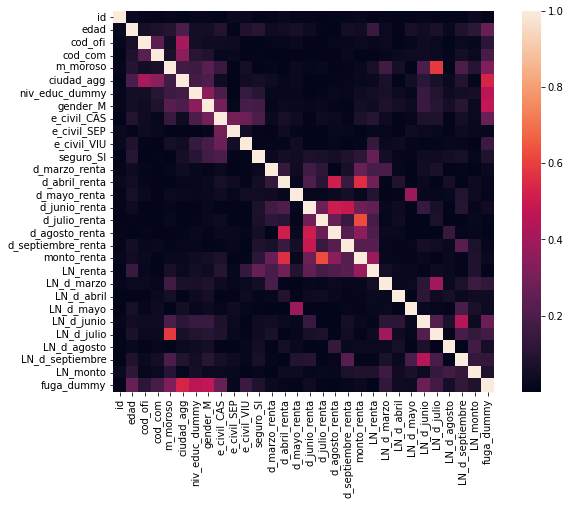

In [ ]:
corrmat = df_fuga_.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(corrmat, square=True)
plt.show()

In [ ]:
#Correlation matrix
fig = px.imshow(corrmat)
fig.show()

In [ ]:
#Sacar código oficina y código comuna
df_fuga_ = df_fuga_.drop(columns=['cod_com','cod_ofi'])

# **UTILIDAD**

In [ ]:
df_fuga_.std().to_frame().rename(columns={0:'std'})

,std
id,662.365081
edad,8.077337
m_moroso,0.751906
ciudad_agg,0.835712
niv_educ_dummy,0.493346
gender_M,0.488182
e_civil_CAS,0.483401
e_civil_SEP,0.217361
e_civil_VIU,0.202270
seguro_SI,0.406231


In [ ]:
del df_fuga_["id"]

Arriba se ve que ninguna de nuestras variables están muy concentradas, así que por el método de variables concentradas no vamos dropar por hora más ninguna.

# **RELEVANCIA**
Mediante la discretización de las variables numéricas y la obtención de los p values es posible discriminar entre aquellas variables que servirán para nuestro modelo y aquellas que no

In [ ]:
cut_points =  df_fuga_['d_agosto_renta'].quantile([0.2, 0.4,0.6, 0.8,1]) #el array es como quiero dividir los datos
Ingreso_binned = pd.cut( df_fuga_['d_agosto_renta'], bins =cut_points, include_lowest= True, duplicates = "drop" ) # bins puede ser un int tambien con el numero de diviciones en el intervalo y en base a eso lo divide


In [ ]:
tbl = pd.crosstab(index= Ingreso_binned,columns= df_fuga_['fuga_dummy'])
stat, p, dof, expected = chi2_contingency(tbl)
print('Valor chi cuadrado  = %d' % stat) 
print('P-valor  =%f' % p)

Valor chi cuadrado  = 13
P-valor  =0.000232


In [ ]:
X = df_fuga_.loc[:, df_fuga_.columns != 'fuga_dummy'] 
y = df_fuga_.loc[:, df_fuga_.columns == 'fuga_dummy']
X.shape 

(2294, 26)

La siguiente matriz nos muestra todos los p values asociados a nuestras variables. Aquellos que sean mayores a 5% serán eliminados posteriormente

In [ ]:
X_new = SelectKBest(k=5).fit(X, y.values.ravel()) 
#Veamos el test F y p-valor de todas las variables (no importa que diga k=5; es un número arbitrario)
print(X_new.scores_)
print(X_new.pvalues_)
#Vemos que todas las variables son relevantes para el problema (p-valor<0.05). No descartamos variables

[177.73380574 264.8547959  912.8140559  617.84580078 668.97166415
 177.93615113   0.74631729  55.21063257  15.28631244   1.77920249
   0.34518214   0.2786289    3.63810564   0.15863057   0.00386905
   0.38342988   2.10375945   0.00000165  40.86622848   3.81408363
   2.42243123 181.08588811  70.93616594   7.1629596   40.53624681
  14.66146328]
[0.         0.         0.         0.         0.         0.
 0.3877351  0.         0.00009507 0.18237981 0.55691103 0.5976524
 0.05659603 0.69045756 0.95040761 0.53583486 0.1470743  0.99897673
 0.         0.05094494 0.11974723 0.         0.         0.00749544
 0.         0.0001321 ]


In [ ]:
#eliminación de las variables irrelevantes
del df_fuga_["e_civil_SEP"]
del df_fuga_["d_marzo_renta"]
del df_fuga_["d_abril_renta"]
del df_fuga_["d_mayo_renta"]
del df_fuga_["d_junio_renta"]
del df_fuga_["d_julio_renta"]
del df_fuga_["d_agosto_renta"]
del df_fuga_["d_septiembre_renta"]
del df_fuga_["monto_renta"]
del df_fuga_["LN_renta"]
del df_fuga_["LN_d_abril"]
del df_fuga_["LN_d_mayo"]

# RELEVANCIA - OPCIÓN 2
También se pueden seleccionar las columnas con un p valor menor a un 5% mediante el siguiente algoritmo. Ambos funcionan pero quisimos realizarlo de las dos formas.

In [ ]:
#Aplicación SelectKBest con f_classif por ser un problema de clasificación
x = df_fuga_.drop(columns=['fuga_dummy'])
y = df_fuga_['fuga_dummy']
f_classif_fuga = SelectKBest(score_func=f_classif, k='all')
fit_fuga = f_classif_fuga.fit(x,y)

#Verificando si tienen p-valor > 0.05
binary_array_p_valor = np.where(fit_fuga.pvalues_ > 0.05,1,0)
cols_eligidas = []

for i in range(len(binary_array_p_valor)):
  if binary_array_p_valor[i] == 0: #Si tiene p-valor menor que 0.05 guardamos el index
    cols_eligidas.append(i)
    

#Dataset sólo con columnas con p-valor < 0.05
df_fuga_selected = pd.concat([ df_fuga_.iloc[:,cols_eligidas], y ], axis=1)
df_fuga_selected.head(10)

,edad,m_moroso,ciudad_agg,niv_educ_dummy,gender_M,e_civil_CAS,e_civil_VIU,seguro_SI,LN_d_marzo,LN_d_junio,LN_d_julio,LN_d_agosto,LN_d_septiembre,LN_monto,fuga_dummy
0,39,2,4.0,0,1,1,0,0,0.000000,12.981624,7.477038,9.117238,5.831882,14.508658,0
1,49,1,3.0,0,0,0,1,1,0.000000,0.000000,3.891820,0.000000,0.000000,15.830414,0
2,39,1,4.0,0,1,1,0,0,0.000000,0.000000,5.780744,10.184523,7.981392,15.894952,0
3,36,1,3.0,1,0,1,0,0,0.000000,12.201055,4.553877,0.000000,4.663439,14.771022,0
4,44,1,3.0,0,1,1,0,0,0.000000,11.211280,5.010635,0.000000,5.609472,15.671809,0
5,40,2,3.0,0,1,1,0,0,0.000000,9.393412,6.464588,4.779123,5.043425,15.856731,1
6,45,1,3.0,1,1,1,0,0,13.235665,0.000000,7.289611,9.655090,7.329094,14.880222,1
7,41,1,3.0,0,0,0,0,1,0.000000,13.171774,2.639057,0.000000,6.169611,14.557448,0
8,33,1,1.0,0,0,1,0,0,0.000000,0.000000,3.806662,0.000000,0.000000,14.285515,0
9,39,1,3.0,0,0,0,1,0,0.000000,13.007843,6.763885,0.000000,6.811244,14.845130,0


In [ ]:
df_fuga_.to_excel('BBDD2.xlsx',index=False)

Normalización

---
Antes de exportar vamos hacer dos datasets para el uso futuro en los modelos de ML.

1- Vá a tener las columnas cómo ya están;

2- Vamos hacer el proceso de normalización y escalar todos los valores entre 0 y 1 para los modelos que necesitan esa configuración.


In [ ]:
fuga_dummy = df_fuga_selected['fuga_dummy']
scaler = MinMaxScaler()
scaler_data = scaler.fit(df_fuga_selected)
df_fuga_selected_scaled = pd.DataFrame(scaler_data.transform(df_fuga_selected), index=df_fuga_selected.index, columns=df_fuga_selected.columns)
df_fuga_selected_scaled['fuga_dummy'] = fuga_dummy
df_fuga_selected_scaled.head(2)

,edad,m_moroso,ciudad_agg,niv_educ_dummy,gender_M,e_civil_CAS,e_civil_VIU,seguro_SI,LN_d_marzo,LN_d_junio,LN_d_julio,LN_d_agosto,LN_d_septiembre,LN_monto,fuga_dummy
0,0.230769,0.666667,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,0.770767,0.802034,0.800139,0.46926,0.500000,0
1,0.358974,0.333333,0.666667,0.0,0.0,0.0,1.0,1.0,0.0,0.000000,0.417461,0.000000,0.00000,0.976723,0


Exportando los dataset finales.

In [ ]:
#En CSV para uso futuro de nosotros
df_fuga_selected.to_csv('dataset_fuga_pre_procesado.csv', sep=',', decimal='.')
df_fuga_selected_scaled.to_csv('dataset_fuga_pre_procesado_scaled.csv', sep=',', decimal='.')

#En Excel para compartir
df_fuga_selected.to_excel('dataset_fuga_pre_procesado_excel.xlsx', index=False)
df_fuga_selected_scaled.to_excel('dataset_fuga_pre_procesado_scaled_excel.xlsx', index=False)